In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# K-meansスクラッチ
class ScratchKMeans():
    """
    K-means のスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2,n_init=20,max_iter=100,tol=1e-5,verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def _remyu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)
        
    def _reclustering(self,X):
        for i in range(len(X)):
            
            dist_m = 10**10
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j
                    
    def _sse(self,X):
        self.best_sse = 10**10
        
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
    
    def _silhouette(self,X):
        return
        
    def fit(self, X):
        """
        K-meansによりクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        
        for k in range(self.n_init):
            
            # クラスタ数に対する中心点μkの初期設定
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
        
            # クラスタ値を設定する
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            
            for ite in range(self.max_iter):
                self._reclustering(X_cluster)
                
                old_myu = self.myu
                self._remyu(X_cluster)
            
                # verboseをtrueに設定した場合の学習過程を出力
                if self.verbose:
                    fig = plt.subplots(figsize=(10,8))
                    plt.rcParams["font.size"] = 20
                    
                    for i in range(self.n_clusters):
                        plt.scatter(X[X_cluster[:,-1]==i,0],X[X_cluster[:,-1]==i,1],s=80)
                    plt.scatter(self.myu[:,0],self.myu[:,1],s=100)
                    plt.show()
                
                # 繰り返し継続判定
                if np.sum(old_myu - self.myu) < self.tol:
                    self._sse(X_cluster)
                    break
                
                self._sse(X_cluster)
                
            
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        y_pred = np.zeros(len(X))
        
        for i in range(len(X)):
            dist_m = 10**10
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

In [3]:
# K-meansスクラッチ（コードの可読性 < 計算速度）
class ScratchKMeans_speed():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2,n_init=20,max_iter=100,tol=1e-5,verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def _remyu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[self.cluster==j],axis=0)
        
    def _reclustering(self,X):
        diff = (X-self.myu[:,None]).reshape(-1,2)
        self.dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.n_clusters,-1).T
        
        self.cluster = np.argmin(self.dist,axis=1)
        
    def _sse(self,X):
        diff = (X-self.myu[:,None]).reshape(-1,2)
        self.dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.n_clusters,-1).T
        sse = np.sum(np.min(self.dist,axis=1)**2)
        
        self.best_sse = 10**10
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
            self._silhouette(X) if self.n_clusters >=2 else _
    
    def _silhouette(self,X):
        ab = np.zeros([len(X),2])
        
        self.silhouette_vals = np.zeros(len(X))
        
        for i,j in enumerate(X):
            ab[i,0] = np.sum(np.linalg.norm(j-X[self.cluster == self.cluster[i]],ord=2,axis=1))/len(X[self.cluster == self.cluster[i]]-1)
            ab[i,1] = np.mean(np.linalg.norm(j-X[self.cluster == self.dist[i].argsort()[1]],ord=2,axis=1))
        
            self.silhouette_vals[i] = (ab[i,1] - ab[i,0])/np.max(ab[i])
        
        self.silhouette_avg = np.mean(self.silhouette_vals)
        self.y_km = self.cluster
        self.cluster_labels = np.unique(self.cluster)
        
    def fit(self, X):
        """
        K-meansによりクラスタリングを計算
        Parameters
        ----------
        X : 次の形の ndarray、形状 (n_samples、n_features)
            訓練データの特徴
        """
        
        for k in range(self.n_init):
            
            # クラスタ数に対する中心点μkの初期設定
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            
            for ite in range(self.max_iter):
                self._reclustering(X)
                
                old_myu = self.myu
                self._remyu(X)
            
                # verboseをtrueに設定した場合の学習過程を出力
                if self.verbose:
                    fig = plt.subplots(figsize=(10,8))
                    plt.rcParams["font.size"] = 20
                    
                    for i in range(self.n_clusters):
                        plt.scatter(X[self.cluster==i,0],X[self.cluster==i,1],s=80)
                    plt.scatter(self.myu[:,0],self.myu[:,1],s=100)
                    plt.show()
                
                # 繰り返し継続判定
                if np.sum(old_myu - self.myu) < self.tol:
                    self._sse(X)
                    break
                
                self._sse(X)
                
            
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        diff = (X-self.record_myu[:,None]).reshape(-1,2)
        dist = np.linalg.norm(diff,ord=2,axis=1).reshape(self.record_cluster,-1).T
        return np.argmin(dist,axis=1)

In [4]:
# シンプルデータセット3
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

In [5]:
X.shape

(100, 2)

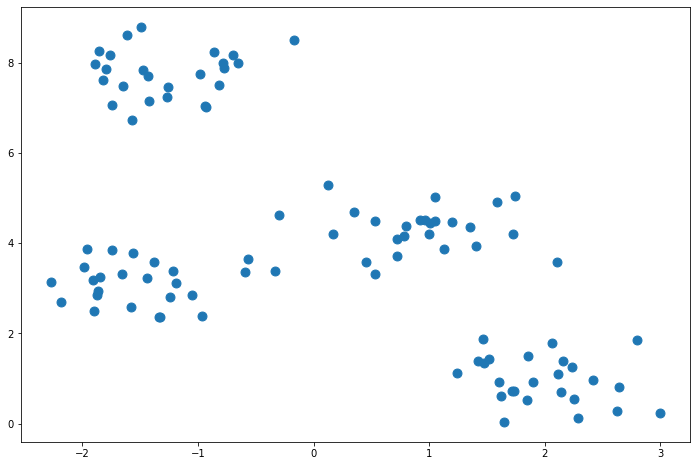

In [6]:
# データ分布の可視化
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80);

In [7]:
# 問題1:中心点の初期値を決める

In [8]:
# k をランダムに選択する.
k = 2
myu = X[np.random.choice(len(X),size=k,replace=False)]
print(myu.shape)
print(myu)

(2, 2)
[[-1.91186205  3.18750686]
 [-1.497272    8.80022604]]


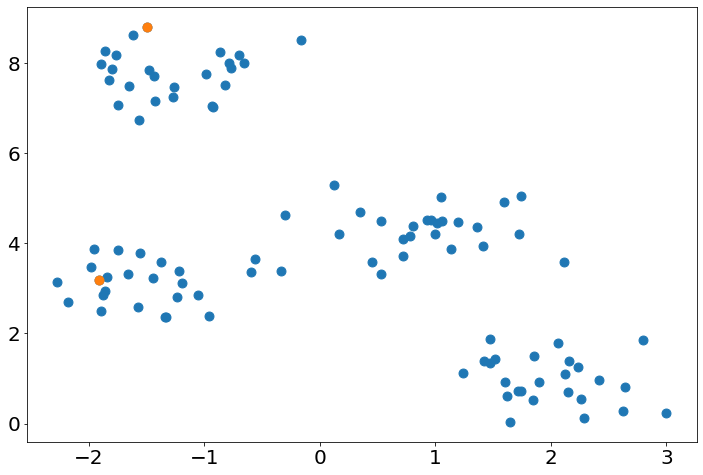

In [9]:
# データ分布の可視化
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80)
plt.scatter(myu[:,0],myu[:,1],s=80);

In [10]:
# 問題2:SSEを求める関数の作成

In [11]:
num =10

# 検証用のラベルを追加する
label = np.random.randint(0,k,len(X[0:num]))
X_test = np.concatenate([X[0:num],label.reshape(-1,1)],axis=1)
print(X_test.shape)
print(X_test)

(10, 3)
[[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  1.        ]
 [ 1.35678894  4.36462484  1.        ]
 [ 1.05374379  4.49286859  0.        ]
 [ 1.59141542  4.90497725  1.        ]
 [ 0.78260667  4.15263595  1.        ]
 [-1.95751686  3.87291474  1.        ]
 [-0.77354537  7.87923564  1.        ]
 [ 0.12313498  5.27917503  1.        ]
 [-1.43284669  7.71577043  1.        ]]


In [12]:
# ユークリッド距離の計算
np.sqrt(np.sum((X[0]-myu[0])**2))

2.684753892732074

In [13]:
# L2ノルムで計算
np.linalg.norm(X[0]-myu[0],ord=2)

2.684753892732074

In [14]:
# SSE 小テスト
for i in range(5):
    for j in range(len(myu)):
        if j == X_test[i,2]:
            sse = np.sqrt(np.sum((X_test[i,0:2]-myu[j])**2))
    print(sse)

2.684753892732074
0.9213562841517413
5.27448783508026
3.2401832133395363
4.971212439016166


In [15]:
# L2ノルムで計算
for i in range(5):
    for j in range(len(myu)):
        if j == X_test[i,2]:
            sse = np.linalg.norm(X_test[i,0:2]-myu[j])
    print(sse)

2.684753892732074
0.9213562841517413
5.27448783508026
3.2401832133395363
4.971212439016166


In [16]:
# 問題3:クラスタへの割り当て

In [17]:
# 再クラスタリング 小テスト
for i in range(5):
    dist_m = 10**10
    for j in range(len(myu)):
        dist = np.sqrt(np.sum((X_test[i,:-1]-myu[j])**2))
        print(dist)
        if dist < dist_m:
            dist_m = dist
            X_test[i,-1] = j
        
    print('New_Label:',X_test[i,2])

2.684753892732074
5.549343866924436
New_Label: 0.0
4.781509449543119
0.9213562841517413
New_Label: 1.0
3.474145368356347
5.27448783508026
New_Label: 0.0
3.2401832133395363
5.006097263952339
New_Label: 0.0
3.9016224297740223
4.971212439016166
New_Label: 0.0


In [18]:
# 再クラスタリング 小テスト
dist_nd = np.zeros([len(X),k])
print(dist_nd.shape)

for i in range(len(X)):
    for j in range(k):
        dist_nd[i,j] = np.linalg.norm(X[i]-myu[j])
print(dist_nd[0:5])

(100, 2)
[[2.68475389 5.54934387]
 [4.78150945 0.92135628]
 [3.47414537 5.27448784]
 [3.24018321 5.00609726]
 [3.90162243 4.97121244]]


In [19]:
# ndarrayの違い - 確認
show = False
if show:
    for i in range(len(X)):
        for j in range(k):
            print(X[i]-myu[j])

In [20]:
# forがなければいけないのか
norm = (X-myu[:,None]).reshape(-1,2)
#tmp = norm.reshape(-1,2)

# reshape(n_clusters,-1).T
cal = np.linalg.norm(norm,ord=2,axis=1).reshape(2,-1).T
cal[0:5]

array([[2.68475389, 5.54934387],
       [4.78150945, 0.92135628],
       [3.47414537, 5.27448784],
       [3.24018321, 5.00609726],
       [3.90162243, 4.97121244]])

In [21]:
cl = np.argmin(cal,axis=1)
cl

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [22]:
# 問題4:中心点の移動

In [23]:
# 中心点μkを移動させる 小テスト
np.mean(X_test[X_test[:,2]==0,:-1],axis=0)

array([1.18070392, 4.36898548])

In [24]:
X_test

array([[ 0.72086751,  3.71347124,  0.        ],
       [-1.89468423,  7.96898545,  1.        ],
       [ 1.35678894,  4.36462484,  0.        ],
       [ 1.05374379,  4.49286859,  0.        ],
       [ 1.59141542,  4.90497725,  0.        ],
       [ 0.78260667,  4.15263595,  1.        ],
       [-1.95751686,  3.87291474,  1.        ],
       [-0.77354537,  7.87923564,  1.        ],
       [ 0.12313498,  5.27917503,  1.        ],
       [-1.43284669,  7.71577043,  1.        ]])

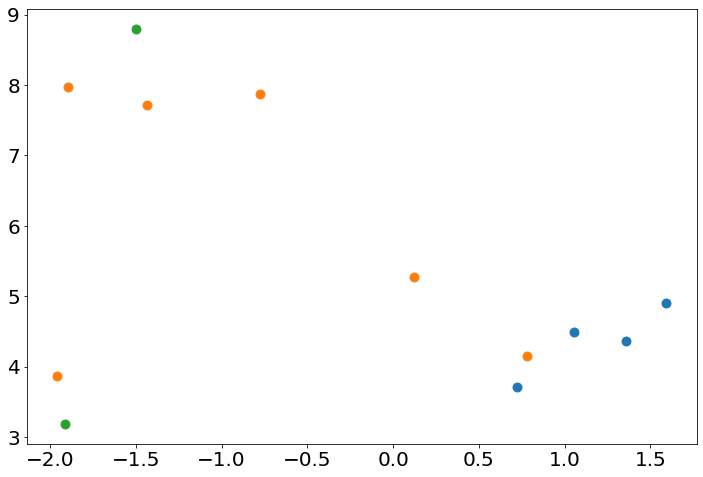

In [25]:
# データ分布の可視化
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X_test[X_test[:,2]==0,0],X_test[X_test[:,2]==0,1],s=80)
plt.scatter(X_test[X_test[:,2]==1,0],X_test[X_test[:,2]==1,1],s=80)
plt.scatter(myu[:,0],myu[:,1],s=80);

In [26]:
# 問題5:繰り返し

In [27]:
# トレーニングデータとバリデーションデータに分割
from sklearn.model_selection import train_test_split
X_train, X_valid = \
train_test_split(X,train_size=0.8,random_state=None)

print(X_train.shape)
print(X_valid.shape)

(80, 2)
(20, 2)


In [28]:
# 問題6:異なる初期値で計算

In [29]:
clf = ScratchKMeans(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)
clf.fit(X_train)

In [30]:
# 問題7:推定

In [31]:
# 検証データを推定するためのスクラッチクラスタリング
pred = clf.predict(X_valid)
print(pred)

[0. 3. 0. 2. 0. 3. 2. 0. 2. 0. 2. 2. 3. 2. 3. 3. 0. 3. 0. 0.]


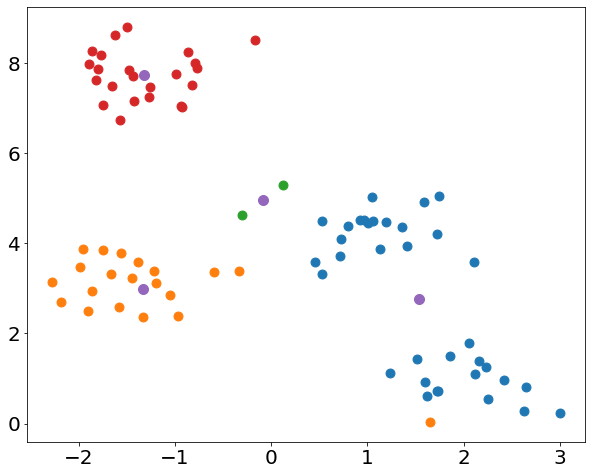

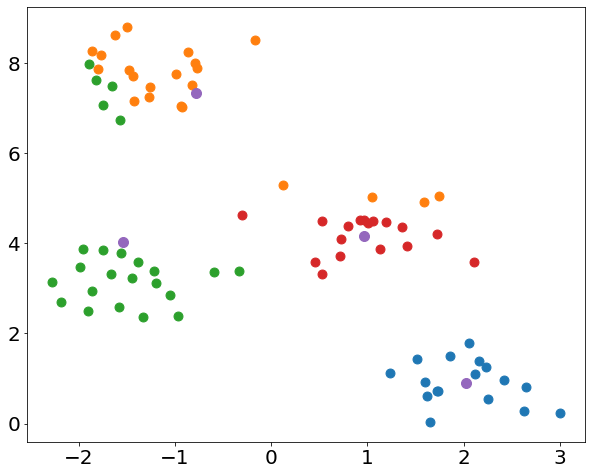

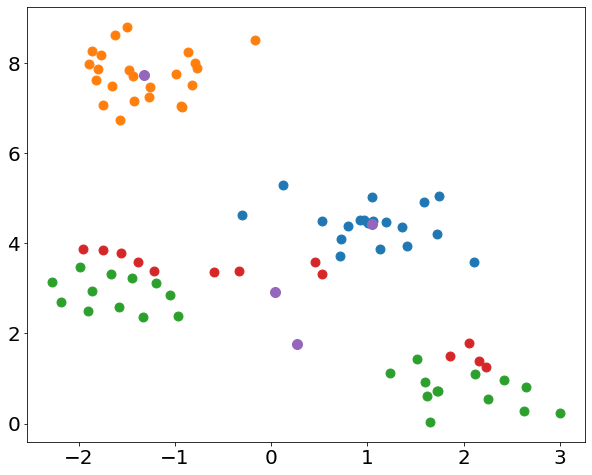

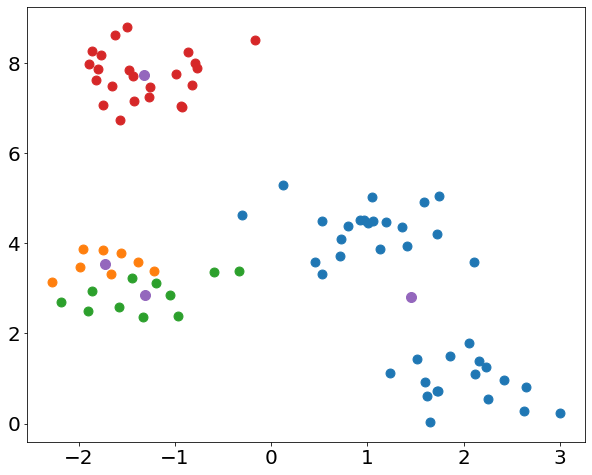

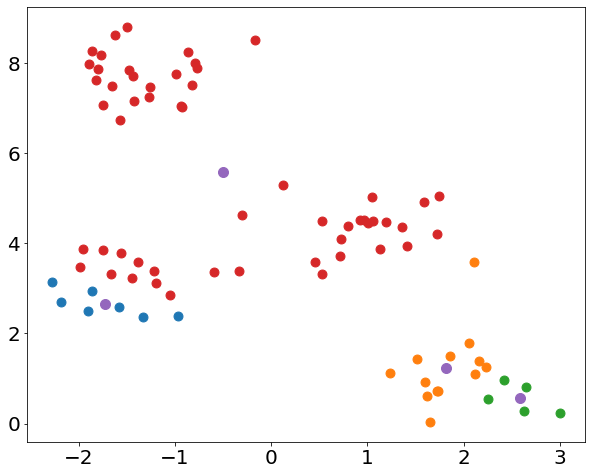

In [32]:
clf2 = ScratchKMeans_speed(n_clusters=4,n_init=5,max_iter=1000,tol=1e-5,verbose=True)
clf2.fit(X_train)

In [33]:
# スクラッチ クラスタリング2による検証データの推定
pred = clf2.predict(X_valid)
print(pred)

[2 3 1 0 1 3 0 1 0 1 0 0 3 0 3 3 2 3 1 1]


In [34]:
%%timeit
clf = ScratchKMeans(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)

321 ns ± 8.48 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [35]:
%%timeit
clf2 = ScratchKMeans_speed(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)

309 ns ± 5.38 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [36]:
# 問題8:エルボー法の実装

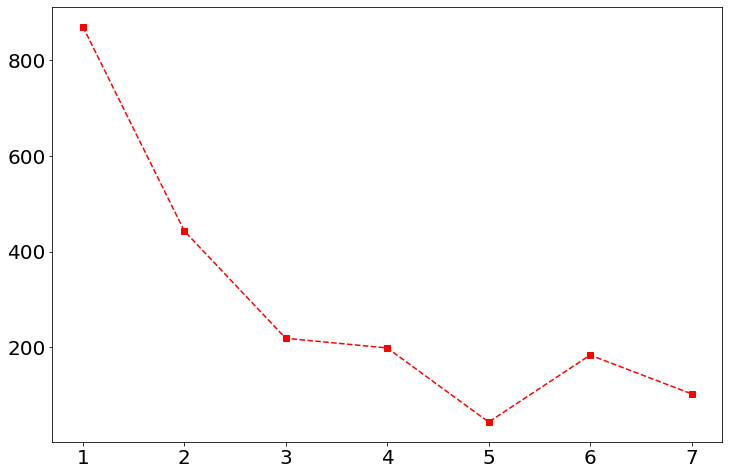

In [37]:
# エルボー法によるモデル評価（可視化）
elbow = {}
for k in range(1,8):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse

fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

In [38]:
# 問題9:(アドバンス課題)シルエット図

In [39]:
# 並び替え、インデックス取得
print(myu)
print(myu[1].argsort()[1])

[[-1.91186205  3.18750686]
 [-1.497272    8.80022604]]
1


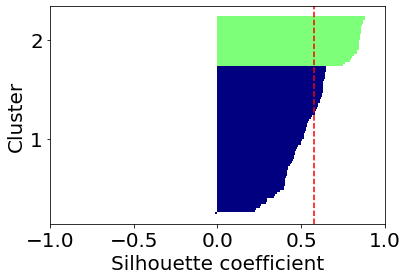

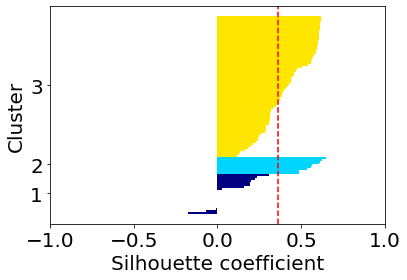

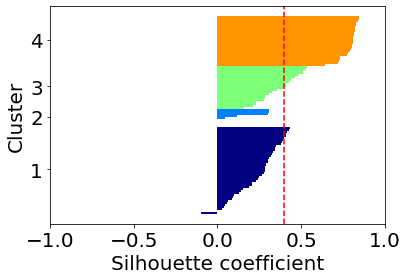

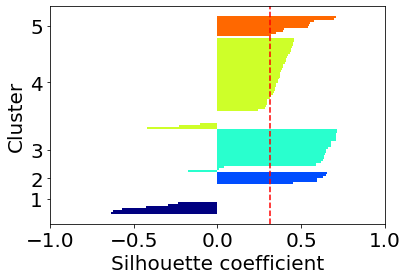

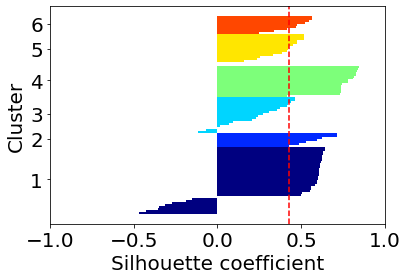

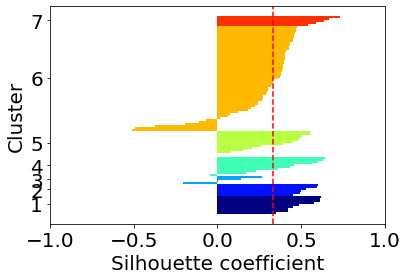

In [40]:
# シルエット図を可視化する
from matplotlib import cm

plt.rcParams["font.size"] = 20

for k in range(2,8):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5)
    model.fit(X)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(model.cluster_labels):
        c_silhouette_vals = model.silhouette_vals[model.y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / model.n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    
    plt.axvline(model.silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, model.cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.xlim(-1,1)
    plt.show()

In [41]:
# クラスター解析ライブラリのインポート
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import warnings

In [42]:
warnings.simplefilter('ignore')

In [49]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/
data = pd.DataFrame(pd.read_csv('./Wholesale customers data.csv'))

ModuleNotFoundError: No module named 'google.colab'

In [47]:
data.columns

NameError: name 'data' is not defined

In [ ]:
# info
data.info()

In [ ]:
# describe
data.describe()

In [ ]:
# ペアプロット
sns.pairplot(data,hue='Channel');

In [ ]:
data.groupby(['Channel','Region']).count()

In [ ]:
data.groupby(['Region']).mean()

In [ ]:
data.groupby(['Channel']).mean()

In [ ]:
# 問題10:クラスタ数kの選択

In [ ]:
# チャンネルとリージョンの削除
data_c = data.iloc[:,2:7]
data_c

In [ ]:
# 対数変換
data_log = data_c.apply(np.log1p)

In [ ]:
# ペアプロット
sns.pairplot(data_log);

In [ ]:
# 分散説明率
n = 4

pca = PCA(n_components=n)
pca = pca.fit(data_log)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

fig = plt.subplots(figsize=(12,8))
plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, n+1,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# PCA分析（可視化のための次元削減）
pca = PCA(n_components=2)
pca = pca.fit(data_log)
data_pca = pca.transform(data_log)
plt.plot(data_pca[:,0],data_pca[:,1],'bo');

In [ ]:
# スクラッチK-meansによるクラスタリング

# エルボー法によるモデル評価（可視化）
elbow = {}
for k in range(1,5):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5,verbose=False)
    model.fit(data_pca)
    elbow[k] = model.best_sse

fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(elbow.keys(),elbow.values(),'rs--');

In [ ]:
# シルエット図を可視化する

plt.rcParams["font.size"] = 20

for k in range(2,5):
    model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5)
    model.fit(data_pca)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(model.cluster_labels):
        c_silhouette_vals = model.silhouette_vals[model.y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / model.n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    
    plt.axvline(model.silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, model.cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.xlim(-1,1)
    plt.show()

In [ ]:
# k=3 clustering
model = ScratchKMeans_speed(n_clusters=3,n_init=100,max_iter=1000,tol=1e-5)
model.fit(data_pca)

In [ ]:
# Label values after clustering
cluster = model.y_km

# Join to data
data['Cluster'] = cluster

In [ ]:
data

In [ ]:
data_pca_label_ = np.concatenate([data_pca,cluster.reshape(-1,1)],axis=1)
data_pca_label_

In [ ]:
# Visualization
for i in range(model.n_clusters):
    plt.scatter(data_pca_label_[cluster==i,0],data_pca_label_[cluster==i,1]);

In [ ]:
# 問題11:既知のグループとの比較

In [ ]:
feature = 'Channel'

fig = plt.figure()
ax = fig.add_subplot() 
ax = sns.distplot(data[feature])

plt.title(feature);

In [ ]:
feature = 'Region'

fig = plt.figure()
ax = fig.add_subplot() 
ax = sns.distplot(data[feature])

plt.title(feature);

In [ ]:
feature = 'Cluster'

fig = plt.figure()
ax = fig.add_subplot() 
ax = sns.distplot(data[feature])

plt.title(feature);

In [ ]:
# 問題12:卸売業者にとって有益な情報

In [ ]:
data.groupby(['Channel','Region','Cluster']).agg(['mean','max','min'])

In [ ]:
# ペアプロット
sns.pairplot(data,hue='Cluster');

In [ ]:
# 問題13:(アドバンス課題)他の手法の調査

In [ ]:
# 問題14:(アドバンス課題)t-SNEとDBSCANの利用

In [ ]:

# import
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [ ]:
data_embedded = TSNE(n_components=2).fit_transform(data_log)

In [ ]:
clusteringDBSCAN = DBSCAN(eps=2, min_samples=2).fit(data_embedded)
clusteringDBSCAN.labels_

In [ ]:
# 可視化
unique = np.unique(clusteringDBSCAN.labels_)
for i in unique:
    plt.scatter(data_pca_label_[clusteringDBSCAN.labels_==i,0],data_pca_label_[clusteringDBSCAN.labels_==i,1]);

In [ ]:
# k=2 clustering
model = ScratchKMeans_speed(n_clusters=2,n_init=100,max_iter=1000,tol=1e-5)
model.fit(data_pca)

# クラスタリング後のラベル値
cluster = model.y_km

# データとの結合
data['Cluster'] = cluster

data.groupby(['Channel','Region','Cluster']).agg(['mean','max','min'])

In [ ]:
data.groupby(['Channel','Cluster']).mean()

In [ ]:
data.groupby(['Region','Cluster']).mean()

In [ ]:
# ペアプロット
sns.pairplot(data,hue='Cluster');